
# Исследование надёжности заёмщиков
<div class="alert alert-block alert-info">
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## 1. Подготовка данных

### 1.1. Изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')

# открытие файла
data = pd.read_csv('data.csv')
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
# функция для изучения данных
def open_info(data):
    # вывод 5 строк данных
    print('*******************************************************')
    print('Представление датафрейма')
    display(data.head())
    print('*******************************************************')
    # вывод информации о датафрейме
    print('Общая информация о датафрейме')
    print('')
    print(data.info())
    print('*******************************************************')
    # вывод информации о распределении данных
    print('Распределение данных')
    display(data.describe())
    print('*******************************************************')
    # проверка на наличие дубликатов
    print('Дубликаты:', data.duplicated().sum())
    print('*******************************************************')
    # проверка на наличие пропусков
    print('Пропуски:', data.isnull().sum())

In [3]:
open_info(data)

*******************************************************
Представление датафрейма


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


*******************************************************
Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None
*******************************************************
Распределение данных


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


*******************************************************
Дубликаты: 54
*******************************************************
Пропуски: children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


<div class="alert alert-success"> 
    
**Общие сведения**  
В файле 12 столбцов и 21525 строк. Соответственно в таблице представлены данные по 21524 людям.

**Информация по данным в столбцах**  
**Тип данных**  
7 столбцов с количественными данными: 5 с целочисленными: 'children', 'dob_years', 'education_id', 'family_status_id', 'debt' - 2 с вещественными: 'days_employed' и 'total_income'. 5 столбцов с категориальными данными: 'education', 'family_status', 'gender', 'income_type', 'purpose'.  

**Наличие / отсутствие пропусков**  
Есть пропуски в столбцах 'days_employed' и 'total_income', так как строк с заполненной информацией в них меньше, чем в других столбцах.  

**Наличие / отсутствие дубликатов**  
При первом знакомстве с таблицей видно, что присутствуют дупликаты в столбцах 'education' и 'purpose'.

### 1.2. Обработка пропусков

In [4]:
# анализ данных таблицы в строках, где есть пропуски
data[data['days_employed'].isna()].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
65,0,NaN,21,среднее,1,Не женат / не замужем,4,M,компаньон,0,NaN,операции с коммерческой недвижимостью
67,0,NaN,52,высшее,0,женат / замужем,0,F,пенсионер,0,NaN,покупка жилья для семьи
72,1,NaN,32,высшее,0,женат / замужем,0,M,госслужащий,0,NaN,операции с коммерческой недвижимостью
82,2,NaN,50,высшее,0,женат / замужем,0,F,сотрудник,0,NaN,жилье
83,0,NaN,52,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,жилье


In [5]:
# заполнение пропущенных значений в столбце 'days_employed' нулевыми значениями
data['days_employed'].fillna(0, inplace=True)

# заполнение пропущенных значений в столбце 'total_income' медианным значением с учетом данных столбца 'income_type'
data['total_income'] = data.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))

# проверка
data.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### 1.3. Работа с аномальными значениями

In [6]:
# поиск нестандартных данных в столбце 'children'
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [7]:
# анализ данных таблицы в строках, имеющих в столбце 'children' отрицательное значение - "-1"
data[data['children'] == -1]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
291,-1,-4417.703588,46,среднее,1,гражданский брак,1,F,сотрудник,0,102816.346412,профильное образование
705,-1,-902.084528,50,среднее,1,женат / замужем,0,F,госслужащий,0,137882.899271,приобретение автомобиля
742,-1,-3174.456205,57,среднее,1,женат / замужем,0,F,сотрудник,0,64268.044444,дополнительное образование
800,-1,349987.852217,54,среднее,1,Не женат / не замужем,4,F,пенсионер,0,86293.724153,дополнительное образование
941,-1,0.000000,57,Среднее,1,женат / замужем,0,F,пенсионер,0,118514.486412,на покупку своего автомобиля
1363,-1,-1195.264956,55,СРЕДНЕЕ,1,женат / замужем,0,F,компаньон,0,69550.699692,профильное образование
1929,-1,-1461.303336,38,среднее,1,Не женат / не замужем,4,M,сотрудник,0,109121.569013,покупка жилья
2073,-1,-2539.761232,42,среднее,1,в разводе,3,F,компаньон,0,162638.609373,покупка жилья
3814,-1,-3045.290443,26,Среднее,1,гражданский брак,1,F,госслужащий,0,131892.785435,на проведение свадьбы
4201,-1,-901.101738,41,среднее,1,женат / замужем,0,F,госслужащий,0,226375.766751,операции со своей недвижимостью


In [8]:
# удаление строк с отрицательными значениями в столбце 'children'
data = data.query('children != -1')
# проверка
data['children'].value_counts()

0     14149
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [9]:
# поиск нестандартных данных в столбце 'gender'
data['gender'].value_counts()

F      14201
M       7276
XNA        1
Name: gender, dtype: int64

In [10]:
# анализ данных таблицы в строках, имеющих в столбце 'gender' значение "XNA"
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


In [11]:
# удаление строк со значением "XNA" в столбце 'gender'
data = data.query('gender != "XNA"')
# проверка
data['gender'].value_counts()

F    14201
M     7276
Name: gender, dtype: int64

<div class="alert alert-success"> 
    
**Пропущенные значения**  

Пропущенные значения выявлены в двух столбцах 'days_employed' и 'total_income'. Вместо информации об общем трудовом стаже в днях и ежемесячном доходе видим NaN.

Скорее всего, информация отсутствует в связи с тем, что человек не предоставляет данные о доходе и стаже. Подтверждение стажа и платежеспособности не нужно, если сумма кредита небольшая. Либо это ошибка при сборе данных, но так как одновременно отсутствует информация о трудовом стаже и доходе, то, наверно, всё-таки первое.

Для заполнение пропущенных значений используем метод fillna(). Пропущенные значения не удаляются, так как это приведет к исчезновению других данных в строках, содержащих NaN (данные о детях и семейном положении), что составит 10%. Это может оказаться существенным для результатов исследования.  


**Иные значения, выпадающие из общего перечня**  

Были обнаружены отрицательные значения в двух стоолбцах: 'children' и 'days_employed'. Кроме того, было найдено одно нетрадиционное значение в столбце 'gender'.

Каких либо закономерностей при анализе этих данных выявлено не было. Как кажется, наличие отрицательных значений в столбце 'days_employed' может быть связано с ошибкой сбора данных. Наличие одного и того же отрицательного значения в столбце 'children' можно объяснить возможной заменой отсутствующих значений значением '-1'. Значение 'XNA' в столбце 'gender', как кажется, тоже связано с ошибкой при сборе данных.

Поскольку количество иных значений в столбцах 'children' и 'gender' не превышает даже 1%, они были удалены. Отрицательные значения в столбце 'days_employed' оставлены, так как их процент достаточно велик и их удаление может существенно повлиять на результаты исследования. Трансформации они также не были подвергнуты, потому что для исследовательских задач в данном случае не нужны.

### 1.4. Работа с типами данных

<div class="alert alert-success">
    
Как уже было сказано выше, в таблице присутствует 7 столбцов с количественной информацией, в которых два столбца имеют вещественные данные. Если для столбца с доходом вещественные значения приемлемы, то для столбца с количеством дней - нет. Мы не можем анализировать половину или четверть дня. Поэтому в столбце с информацией об общем трудовом стаже в днях ('days_employed') вещественные значения заменяются нами на целочисленные. Также изменяется тип данных для столбца 'total_income', поскольку для дальнейшей категоризации данных в этом столбце удобнее работать с целыми суммами.

Для изменения типа данных используется метод astype(). С помощью него мы можем указать конкретный тип данных, в который хотим преобразовать информацию в столбце.

In [12]:
# замена типа данных в стобцах 'days_employed' и 'total_income'
data[['days_employed', 'total_income']] = data[['days_employed', 'total_income']].astype('int')

# проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21477 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21477 non-null  int64 
 1   days_employed     21477 non-null  int32 
 2   dob_years         21477 non-null  int64 
 3   education         21477 non-null  object
 4   education_id      21477 non-null  int64 
 5   family_status     21477 non-null  object
 6   family_status_id  21477 non-null  int64 
 7   gender            21477 non-null  object
 8   income_type       21477 non-null  object
 9   debt              21477 non-null  int64 
 10  total_income      21477 non-null  int32 
 11  purpose           21477 non-null  object
dtypes: int32(2), int64(5), object(5)
memory usage: 2.0+ MB


### 1.5. Обработка дубликатов

In [13]:
# поиск дубликатов в столбце 'education'
data['education'].value_counts()

среднее                13719
высшее                  4710
СРЕДНЕЕ                  768
Среднее                  709
неоконченное высшее      666
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

In [14]:
# сохраняем список наименований в нижнем регистре
data['education'] = data['education'].str.lower()
data['family_status'] = data['family_status'].str.lower()
# проверка
data['education'].value_counts()

среднее                15196
высшее                  5251
неоконченное высшее      742
начальное                282
ученая степень             6
Name: education, dtype: int64

In [15]:
# поиск полных дубликатов и их подсчет
data.duplicated().sum()

71

In [16]:
# анализ дублируемых строк
data1 = data[data.duplicated(keep=False)]
data1.query('dob_years == 46')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
120,0,0,46,среднее,1,женат / замужем,0,F,сотрудник,0,142594,высшее образование
9009,0,0,46,среднее,1,женат / замужем,0,F,сотрудник,0,142594,свой автомобиль
9748,0,0,46,среднее,1,гражданский брак,1,F,сотрудник,0,142594,покупка жилья для сдачи
14728,0,0,46,среднее,1,гражданский брак,1,F,сотрудник,0,142594,покупка жилья для сдачи
16378,0,0,46,среднее,1,женат / замужем,0,F,сотрудник,0,142594,высшее образование
19184,0,0,46,среднее,1,женат / замужем,0,F,сотрудник,0,142594,свой автомобиль


<div class="alert alert-success">
    
**Дубликаты** найдены **в столбце 'education'** при первом рассмотрении таблицы. Чтобы найти их все, используется метод 'value_counts()'. Видим, что категориальные данные записываются разным способом: либо нижним регистром, либо верхним, либо в верхнем регистре только первая буква. Чтобы избавиться от дублей, необходимо привести всё к одному типу.

Кроме того с помощью метода 'duplicated()' был найден еще **71 полный дубликат**.

Поскольку дубликаты в столбце 'education' отличаются только регистром одной или всех букв, то для приведения к единообразию номинаций в данном столбце используется метод str.lower()

**Полные дубликаты оставлены в работе**, так как мы не можем быть до конца уверены, что это дубликаты.

В столбце 'education' дубликаты могли появиться в связи с тем, что не были даны четкие критерии того, как заполнять необходимую информацию: только нижним регистром, только верхним и т.д.

Полные дубликаты появились по двум причинам. Во-первых, все дублируемые строки в столбце 'days_employed' имеют одинаковое нулевое значение, которым мы заменяли пропущенные значения, а в столбце 'total_income' совпадение данных происходит за счет того, что вместо пропущенных значений внесены медианные. Во-вторых, в таблице нет id клиентов банка, что тоже ведет к кажущемуся дублированию строк.

### 1.6. Категоризация данных

In [17]:
# поиск дубликатов в столбце 'purpose'
print(data['purpose'].value_counts())

свадьба                                   797
на проведение свадьбы                     776
сыграть свадьбу                           773
операции с недвижимостью                  674
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             644
покупка жилья для семьи                   641
строительство собственной недвижимости    634
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          623
покупка недвижимости                      620
строительство недвижимости                620
покупка своего жилья                      619
ремонт жилью                              611
покупка жилой недвижимости                605
на покупку своего автомобиля              504
заняться высшим образованием      

Первый взгляд на данные позволяет говорить о дублировании смыслов. Например, "высшее образование", "заняться образованием" и "получение высшего образования" - это одно и то же. Посчитаем количество лемм в представленных материалах

In [18]:
# формирование списка со всеми значениями столбца 'purpose'
purpose_list = data['purpose'].tolist()
# print(purpose_list)

# формирование списка со всеми уникальными значениями столбца 'purpose'
purpose_list_short = data['purpose'].unique().tolist()
print(purpose_list_short)

['покупка жилья', 'приобретение автомобиля', 'дополнительное образование', 'сыграть свадьбу', 'операции с жильем', 'образование', 'на проведение свадьбы', 'покупка жилья для семьи', 'покупка недвижимости', 'покупка коммерческой недвижимости', 'покупка жилой недвижимости', 'строительство собственной недвижимости', 'недвижимость', 'строительство недвижимости', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'операции с коммерческой недвижимостью', 'строительство жилой недвижимости', 'жилье', 'операции со своей недвижимостью', 'автомобили', 'заняться образованием', 'сделка с подержанным автомобилем', 'получение образования', 'автомобиль', 'свадьба', 'получение дополнительного образования', 'покупка своего жилья', 'операции с недвижимостью', 'получение высшего образования', 'свой автомобиль', 'сделка с автомобилем', 'профильное образование', 'высшее образование', 'покупка жилья для сдачи', 'на покупку автомобиля', 'ремонт жилью', 'заняться высшим образованием']


In [19]:
# формирование списков со значениями столбца 'purpose', объединённых по леммам
purpose_live = []
purpose_car = []
purpose_study = []
purpose_wedding = []
for lem in purpose_list_short:
    for word in lem.split():
        stemmed_word = russian_stemmer.stem(word)
        if (stemmed_word == 'жил' or stemmed_word == 'недвижим'):
            if word not in purpose_live:
                purpose_live.append(lem)
        if (stemmed_word == 'автомобил' or stemmed_word == 'автомоб'):
            if word not in purpose_live:
                purpose_car.append(lem)
        if (stemmed_word == 'образован'):
            if word not in purpose_live:
                purpose_study.append(lem)
        if (stemmed_word == 'свадьб'):
            if word not in purpose_live:
                purpose_wedding.append(lem)

print('Недвижимость:', purpose_live)
print('Автомобиль:', purpose_car)
print('Образование:', purpose_study)
print('Свадьба:', purpose_wedding)

Недвижимость: ['покупка жилья', 'операции с жильем', 'покупка жилья для семьи', 'покупка недвижимости', 'покупка коммерческой недвижимости', 'покупка жилой недвижимости', 'покупка жилой недвижимости', 'строительство собственной недвижимости', 'недвижимость', 'строительство недвижимости', 'операции с коммерческой недвижимостью', 'строительство жилой недвижимости', 'строительство жилой недвижимости', 'жилье', 'операции со своей недвижимостью', 'покупка своего жилья', 'операции с недвижимостью', 'покупка жилья для сдачи', 'ремонт жилью']
Автомобиль: ['приобретение автомобиля', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'автомобили', 'сделка с подержанным автомобилем', 'автомобиль', 'свой автомобиль', 'сделка с автомобилем', 'на покупку автомобиля']
Образование: ['дополнительное образование', 'образование', 'заняться образованием', 'получение образования', 'получение дополнительного образования', 'получение высшего образования', 'профильное образование', 'высшее 

In [20]:
# избавление от повторов в списке с леммами 'жил' и 'недвижим'
purpose_live2 = []
for x in purpose_live:
    if x not in purpose_live2:
        purpose_live2.append(x)
print('Недвижимость:', purpose_live2)

Недвижимость: ['покупка жилья', 'операции с жильем', 'покупка жилья для семьи', 'покупка недвижимости', 'покупка коммерческой недвижимости', 'покупка жилой недвижимости', 'строительство собственной недвижимости', 'недвижимость', 'строительство недвижимости', 'операции с коммерческой недвижимостью', 'строительство жилой недвижимости', 'жилье', 'операции со своей недвижимостью', 'покупка своего жилья', 'операции с недвижимостью', 'покупка жилья для сдачи', 'ремонт жилью']


In [21]:
# формирование нового столбца номинаций целей кредитов        
def purpose_id(row):
    lem = row['purpose']
    if lem in purpose_live2:
        return 'недвижимость'
    if lem in purpose_car:
        return 'автомобиль'
    if lem in purpose_study:
        return 'образование'
    if lem in purpose_wedding:
        return 'свадьба'

data['purpose_id'] = data.apply(purpose_id, axis=1)

# проверка
display(data.head(5))
data['purpose_id'].value_counts()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба


недвижимость    10815
автомобиль       4304
образование      4012
свадьба          2346
Name: purpose_id, dtype: int64

<div class="alert alert-success">

Чтобы выделить леммы в значениях столбца, мы сначала сформировали список уникальных значений. В этом случае убираются повторы и с номинациями удобнее работать. Также формируется список всех значений столбца для их дальнейшей группировки по леммам. Далее проводится стемминг на материале уникальных значений. После мы группируем значения столбца 'purpose' по леммам. На этом этапе выявляются повторы в списке, объединенном по леммам 'жил' и 'недвижим', так как в нескольких случаях они вместе встречаются в одной строке. Поэтому после формирования групп с помощью цикла избавляемся от повторов в списке 'недвижимость'. Далее формируется новый столбец с обобщенными значениями столбца с целями кредитов - 'purpose_new'.

In [22]:
# сформируем перечень уникальных значений столбца 'children'
data['children'].value_counts()

0     14148
1      4818
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

In [23]:
# категоризация значений столбца 'children'
def children_id(row):
    children_number = row['children']
    if children_number == 0:
            return '0'
    if children_number == 1:
            return '1'
    if children_number >= 2:
            return '>2'
        
data['children_id'] = data.apply(children_id, axis=1)
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_id
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,1
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,1
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,0
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,>2
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,0
5,0,-926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость,0
6,0,-2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость,0
7,0,-152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование,0
8,2,-6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба,>2
9,0,-2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость,0


Сделаем категоризацию для столбца с доходами. Для формирования категорий воспользуемся методом qcut().

In [24]:
# определение границ дохода для каждой группы
pd.qcut(data['total_income'], q=4)

0        (195624.0, 2265604.0]
1         (107775.0, 142594.0]
2         (142594.0, 195624.0]
3        (195624.0, 2265604.0]
4         (142594.0, 195624.0]
                 ...          
21520    (195624.0, 2265604.0]
21521     (142594.0, 195624.0]
21522    (20666.999, 107775.0]
21523    (195624.0, 2265604.0]
21524    (20666.999, 107775.0]
Name: total_income, Length: 21477, dtype: category
Categories (4, interval[float64, right]): [(20666.999, 107775.0] < (107775.0, 142594.0] < (142594.0, 195624.0] < (195624.0, 2265604.0]]

С учетом этих данных сформируем категории.

In [25]:
# формирование нового столбца с уровнем дохода с учетом шкалы дохода
def income_id(row):
    income = row['total_income']
    if income == 0:
        return 'нет данных'
    if income < 110000:
        return '< 110 тыс.'
    if 110000 <= income < 150000:
        return '110-150 тыс.'
    if 150000 <= income < 200000:
        return '150-200 тыс'
    if income >= 200000:
        return '> 200 тыс.'

data['income_id'] = data.apply(income_id, axis=1)

# проверка
display(data.head())
data['income_id'].value_counts()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_id,children_id,income_id
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,1,> 200 тыс.
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,1,110-150 тыс.
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,0,110-150 тыс.
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,>2,> 200 тыс.
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,0,150-200 тыс


110-150 тыс.    6026
< 110 тыс.      5632
> 200 тыс.      5058
150-200 тыс     4761
Name: income_id, dtype: int64

<div class="alert alert-success">

**Общие замечания**  

Категоризация значений проводится для трех столбцов: 'purpose', 'children' и 'total_income'. Были выбраны именно эти столбцы, так как задачи исследования предполагают дальнейшую работу с их данными и удобнее это делать с категоризированными значениями.

**Категоризация данных столбца 'purpose'**  
Данные столбца 'purpose' разделены на четыре категории в зависимости от того, на что берется кредит: на недвижимость, автомобиль, образование или свадьбу. Можно было бы сделать более подробную категоризацию и разделить, например, кредиты категории 'недвижимость' следующим образом: кредиты 'на покупку недвижимости', кредиты 'на ремонт недвижимости', кредиты 'на строительство недвжимости' - но в этом случае могут возникнуть проблемы с классификацией, поскольку не всегда понятно по данным столбца 'purpose', на что берутся деньги: на покупку, строительство или ремонт.

**Категоризация данных столбца 'children'**  
Кроме того, категоризированы данные столбца 'children'. Выбраны три категории: '0', '1', '>2'. В категорию '0' попадают нулевые значения, в категорию '1' значения 1, а в категорию '>2' значения 2, 3, 4, 5 и 20. Значение 20 немного смущает, особенно в строке, где человеку всего 21 год, однако теоретически с большой натяжкой такое может быть возможно, если дети усыновлены или взяты под опеку. Возможно, что при сборе данных произошла ошибка и изначально это было 2, в таком случае наша категоризация помогает снять эту проблему без потери какой-либо информации.

**Категоризация данных столбца 'total_income'**  
Также были категоризированы данные столбца с суммами доходов клиентов банка. Значения категоризировались с учетом процентилей на 4 группы.


## 2. Анализ данных

Посмотрим, есть ли зависимость между наличием детей у клиента и возвратом кредита.

,Кол-во пользователей,Кол-во должников,% должников,% НЕдолжников
children_id,,,,
0,14148,1063,7.51%,92.49%
1,4818,444,9.22%,90.78%
>2,2511,233,9.28%,90.72%


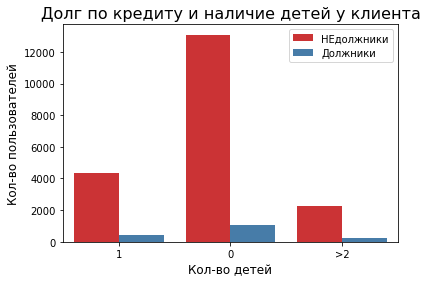

In [26]:
# сводная таблица для определения того, как зависит возврат кредита в срок от наличия детей у клиента
child_debt = data.pivot_table(index = 'children_id', values = 'debt', 
                            aggfunc = ['count', 'sum', 'mean', lambda x: 1 - x.mean()])
child_debt.columns = ['Кол-во пользователей', 'Кол-во должников', '% должников', '% НЕдолжников']
display(child_debt.style.format({'% должников': '{:.2%}', '% НЕдолжников': '{:.2%}'}))

# график
child_debt = sns.countplot(x = 'children_id', hue = 'debt', data = data, palette = 'Set1')
plt.xlabel('Кол-во детей', fontsize=12)
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.title('Долг по кредиту и наличие детей у клиента', fontsize=16);
plt.legend(bbox_to_anchor=(1, 1))
plt.legend(['НЕдолжники', 'Должники']);

Зависимости между наличием детей и возвратом кредита в срок прослеживается небольшая. Среди тех, кто имеет детей, 9% людей имеют долги по кредиту. Среди бездетных, имеющих долги, - 7.5%. При этом количество детей никак не влияет на возврат кредита.

Далее посмотрим, есть ли зависимость между семейным положением и возвратом кредита в срок.

,Кол-во пользователей,Кол-во должников,% должников,% НЕдолжников
family_status,,,,
в разводе,1191,85,7.14%,92.86%
вдовец / вдова,956,63,6.59%,93.41%
гражданский брак,4171,388,9.30%,90.70%
женат / замужем,12351,930,7.53%,92.47%
не женат / не замужем,2808,274,9.76%,90.24%


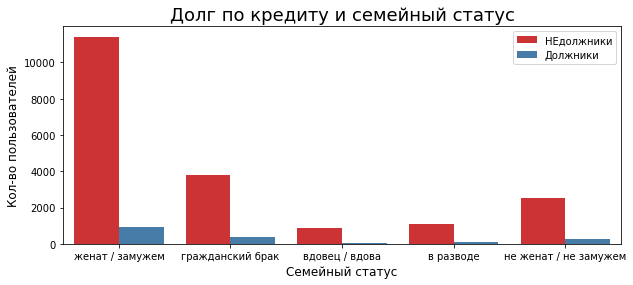

In [27]:
# сводная таблица для определения того, как зависит возврат кредита в срок от семейного положения клиента
family_debt = data.pivot_table(index = 'family_status', values = 'debt', 
                            aggfunc = ['count', 'sum', 'mean', lambda x: 1 - x.mean()])
family_debt.columns = ['Кол-во пользователей', 'Кол-во должников', '% должников', '% НЕдолжников']
display(family_debt.style.format({'% должников': '{:.2%}', '% НЕдолжников': '{:.2%}'}))

# график
family_debt = sns.countplot(x = 'family_status', hue = 'debt', data = data, palette = 'Set1')
plt.xlabel('Семейный статус', fontsize=12)
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.title('Долг по кредиту и семейный статус', fontsize=18);
plt.legend(bbox_to_anchor=(1, 1))
plt.legend(['НЕдолжники', 'Должники'])
family_debt.figure.set_figwidth(10)
family_debt.figure.set_figheight(4)

Зависимость между семейным положением и возвратом кредита в срок есть, но она незначительна. Люди, либо находящиеся в гражданском браке, либо неженатые/незамужние, имеют на 2% больше долгов по кредиту, чем те, кто находится в официальном браке или находился в нем, а сейчас либо овдовел, либо в разводе.

Посмотрим теперь на зависимость между уровнем дохода и возвратом кредита в срок.

,Кол-во пользователей,Кол-во должников,% должников,% НЕдолжников
income_id,,,,
110-150 тыс.,6026,522,8.66%,91.34%
150-200 тыс,4761,405,8.51%,91.49%
< 110 тыс.,5632,455,8.08%,91.92%
> 200 тыс.,5058,358,7.08%,92.92%


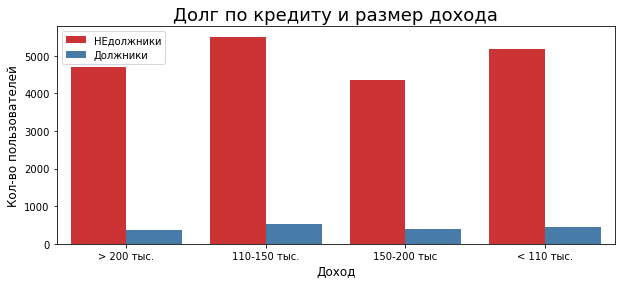

In [28]:
# сводная таблица для определения того, как зависит возврат кредита в срок от уровня дохода клиента
income_debt = data.pivot_table(index = 'income_id', values = 'debt', 
                            aggfunc = ['count', 'sum', 'mean', lambda x: 1 - x.mean()])
income_debt.columns = ['Кол-во пользователей', 'Кол-во должников', '% должников', '% НЕдолжников']
display(income_debt.style.format({'% должников': '{:.2%}', '% НЕдолжников': '{:.2%}'}))

# график
income_debt = sns.countplot(x = 'income_id', hue = 'debt', data = data, palette = 'Set1')
plt.xlabel('Доход', fontsize=12)
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.title('Долг по кредиту и размер дохода', fontsize=18);
plt.legend(bbox_to_anchor=(1, 1))
plt.legend(['НЕдолжники', 'Должники'])
income_debt.figure.set_figwidth(10)
income_debt.figure.set_figheight(4)

Зависимости между уровнем дохода и возвратом кредита в срок есть, но она незначительна. Процент людей, имеющих долги по кредитам, ниже в категориях с доходом выше 200 тысяч - 7%.

Теперь посмотрим, как разные цели кредита влияют на его возврат в срок.

,Кол-во пользователей,Кол-во должников,% должников,% НЕдолжников
purpose_id,,,,
автомобиль,4304,402,9.34%,90.66%
недвижимость,10815,782,7.23%,92.77%
образование,4012,370,9.22%,90.78%
свадьба,2346,186,7.93%,92.07%


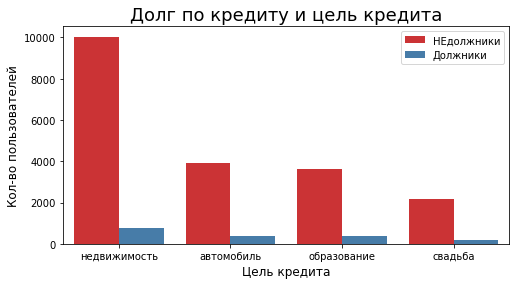

In [29]:
# сводная таблица для определения того, как зависит возврат кредита в срок от цели кредита
purpose_debt = data.pivot_table(index = 'purpose_id', values = 'debt', 
                            aggfunc = ['count', 'sum', 'mean', lambda x: 1 - x.mean()])
purpose_debt.columns = ['Кол-во пользователей', 'Кол-во должников', '% должников', '% НЕдолжников']
display(purpose_debt.style.format({'% должников': '{:.2%}', '% НЕдолжников': '{:.2%}'}))

# график
income_debt = sns.countplot(x = 'purpose_id', hue = 'debt', data = data, palette = 'Set1')
plt.xlabel('Цель кредита', fontsize=12)
plt.ylabel('Кол-во пользователей', fontsize=12)
plt.title('Долг по кредиту и цель кредита', fontsize=18);
plt.legend(bbox_to_anchor=(1, 1))
plt.legend(['НЕдолжники', 'Должники'])
income_debt.figure.set_figwidth(8)
income_debt.figure.set_figheight(4)

Прослеживается зависимость между целью кредита и его возвратом в срок. Самый низкий процент долгов наблюдается при кредитах на недвижимость и свадьбу - 7.23% и 7.93%. По кредитам на автомобиль и образование имеется почти одинаковый процент долгов - 9.34% и 9.22%.

Посмотрим, как несколько факторов могут влиять на возврат кредита.

In [30]:
# сводная таблица для определения того, как зависит возврат кредита в срок от наличия детей и семейного положения клиента
family_child_debt = data.pivot_table(index='family_status',values='debt',
                                     columns='children_id',
                                     aggfunc=['mean', lambda x: 1 - x.mean()])
family_child_debt.columns = ['% должников без детей',
                             '% должников с 1 ребенком',
                             '% должников с 2 детьми и более',
                             '% НЕдолжников без детей',
                             '% НЕдолжников с 1 ребенком',
                             '% НЕдолжников с 2 детьми и более']
family_child_debt.style.format({'% должников без детей': '{:.2%}',
                                '% должников с 1 ребенком': '{:.2%}',
                                '% должников с 2 детьми и более': '{:.2%}',
                                '% НЕдолжников без детей': '{:.2%}',
                                '% НЕдолжников с 1 ребенком': '{:.2%}',
                                '% НЕдолжников с 2 детьми и более': '{:.2%}'})

,% должников без детей,% должников с 1 ребенком,% должников с 2 детьми и более,% НЕдолжников без детей,% НЕдолжников с 1 ребенком,% НЕдолжников с 2 детьми и более
family_status,,,,,,
в разводе,7.02%,6.73%,9.47%,92.98%,93.27%,90.53%
вдовец / вдова,6.25%,9.09%,9.68%,93.75%,90.91%,90.32%
гражданский брак,8.32%,11.82%,9.72%,91.68%,88.18%,90.28%
женат / замужем,6.88%,8.25%,8.99%,93.12%,91.75%,91.01%
не женат / не замужем,9.27%,11.58%,12.77%,90.73%,88.42%,87.23%


Наличие двух детей или более делает выше процент долгов по кредитам на 2% среди тех, кто находится в разводе. У тех, кто находится в гражданском браке, количество долгов по кредитам выше на 2% при наличии одного ребенка в семье, если сравнивать с аналогичными семьями, имеющими двоих детей или более, и на 3% выше, если сравнивать с теми, кто детей не имеет. В целом наличие двух детей и более повышает процент невозвратов кредита, исключение можно сделать для тех, кто замужем или женат. В этой категории количество детей не очень влияет на возвратность кредита.

In [31]:
# сводная таблица для определения того, как зависит возврат кредита в срок от наличия детей у клиента и его уровня дохода
income_child_debt = data.pivot_table(index='income_id',values='debt',
                                     columns='children_id',
                                     aggfunc=['mean', lambda x: 1 - x.mean()])
income_child_debt.columns = ['% должников без детей',
                             '% должников с 1 ребенком',
                             '% должников с 2 детьми и более',
                             '% НЕдолжников без детей',
                             '% НЕдолжников с 1 ребенком',
                             '% НЕдолжников с 2 детьми и более']
income_child_debt.style.format({'% должников без детей': '{:.2%}',
                                '% должников с 1 ребенком': '{:.2%}',
                                '% должников с 2 детьми и более': '{:.2%}',
                                '% НЕдолжников без детей': '{:.2%}',
                                '% НЕдолжников с 1 ребенком': '{:.2%}',
                                '% НЕдолжников с 2 детьми и более': '{:.2%}'})

,% должников без детей,% должников с 1 ребенком,% должников с 2 детьми и более,% НЕдолжников без детей,% НЕдолжников с 1 ребенком,% НЕдолжников с 2 детьми и более
income_id,,,,,,
110-150 тыс.,7.92%,9.93%,10.40%,92.08%,90.07%,89.60%
150-200 тыс,7.88%,9.64%,9.72%,92.12%,90.36%,90.28%
< 110 тыс.,7.41%,9.63%,9.23%,92.59%,90.37%,90.77%
> 200 тыс.,6.79%,7.57%,7.68%,93.21%,92.43%,92.32%


При доходе выше 150 тысяч или ниже 110 тысяч количество детей никак не влияет на возвратность кредита. При доходе же от 110 до 150 тысяч наличие двух детей или более повышает вероятность долга по кредиту на 1%.

In [32]:
# сводная таблица для определения того, как зависит возврат кредита в срок от семейного статуса клиента и его уровня дохода
family_income_debt = data.pivot_table(index='family_status',values='debt',
                                     columns='income_id',
                                     aggfunc=['mean', lambda x: 1 - x.mean()])
family_income_debt.columns = ['% должников с доходом 110-150 тыс.',
                             '% должников с доходом 150-200 тыс.',
                             '% должников с доходом < 110 тыс.',
                             '% должников с доходом > 200 тыс.',
                             '% НЕдолжников с доходом 110-150 тыс.',
                             '% НЕдолжников с доходом 150-200 тыс.',
                             '% НЕдолжников с доходом < 110 тыс.',
                             '% НЕдолжников с доходом > 200 тыс.']
family_income_debt.style.format({'% должников с доходом 110-150 тыс.': '{:.2%}',
                                '% должников с доходом 150-200 тыс.': '{:.2%}',
                                '% должников с доходом < 110 тыс.': '{:.2%}',
                                '% должников с доходом > 200 тыс.': '{:.2%}',
                                '% НЕдолжников с доходом 110-150 тыс.': '{:.2%}',
                                '% НЕдолжников с доходом 150-200 тыс.': '{:.2%}',
                                '% НЕдолжников с доходом < 110 тыс.': '{:.2%}',
                                '% НЕдолжников с доходом > 200 тыс.': '{:.2%}',})

,% должников с доходом 110-150 тыс.,% должников с доходом 150-200 тыс.,% должников с доходом < 110 тыс.,% должников с доходом > 200 тыс.,% НЕдолжников с доходом 110-150 тыс.,% НЕдолжников с доходом 150-200 тыс.,% НЕдолжников с доходом < 110 тыс.,% НЕдолжников с доходом > 200 тыс.
family_status,,,,,,,,
в разводе,8.21%,6.47%,7.36%,6.32%,91.79%,93.53%,92.64%,93.68%
вдовец / вдова,6.33%,11.05%,4.86%,5.81%,93.67%,88.95%,95.14%,94.19%
гражданский брак,10.94%,10.11%,9.23%,6.63%,89.06%,89.89%,90.77%,93.37%
женат / замужем,7.91%,7.39%,7.86%,6.87%,92.09%,92.61%,92.14%,93.13%
не женат / не замужем,9.57%,11.23%,9.12%,9.27%,90.43%,88.77%,90.88%,90.73%


Среди тех, кто находится в разводе или в гражданском браке больше должников с доходом от 110 до 150 тысяч. Среди вдов и вдовцов и тех, кто не женат / не замужем больше долгов у тех, кто зарабатывает от 150 до 200 тысяч. В категории женатых и замужних доход особо не влияет на возратность кредита, если он не составляет больше 200 тысяч.

In [33]:
# сводная таблица для определения того, как зависит возврат кредита в срок от семейного статуса и цели кредита
family_purpose_debt = data.pivot_table(index='family_status',values='debt',
                                     columns='purpose_id',
                                     aggfunc=['mean', lambda x: 1 - x.mean()])
family_purpose_debt.columns = ['% должников с кредитом на автомобиль',
                             '% должников с кредитом на недвижимость',
                             '% должников с кредитом на образование',
                             '% должников с кредитом на свадьбу',
                             '% НЕдолжников с кредитом на автомобиль',
                             '% НЕдолжников с кредитом на недвижимость',
                             '% НЕдолжников с кредитом на образование',
                             '% НЕдолжников с кредитом на свадьбу']
family_purpose_debt.style.format({'% должников с кредитом на автомобиль': '{:.2%}',
                                '% должников с кредитом на недвижимость': '{:.2%}',
                                '% должников с кредитом на образование': '{:.2%}',
                                '% должников с кредитом на свадьбу': '{:.2%}',
                                '% НЕдолжников с кредитом на автомобиль': '{:.2%}',
                                '% НЕдолжников с кредитом на недвижимость': '{:.2%}',
                                '% НЕдолжников с кредитом на образование': '{:.2%}',
                                '% НЕдолжников с кредитом на свадьбу': '{:.2%}',})

,% должников с кредитом на автомобиль,% должников с кредитом на недвижимость,% должников с кредитом на образование,% должников с кредитом на свадьбу,% НЕдолжников с кредитом на автомобиль,% НЕдолжников с кредитом на недвижимость,% НЕдолжников с кредитом на образование,% НЕдолжников с кредитом на свадьбу
family_status,,,,,,,,
в разводе,7.53%,6.97%,7.14%,nan%,92.47%,93.03%,92.86%,nan%
вдовец / вдова,9.17%,5.19%,7.58%,nan%,90.83%,94.81%,92.42%,nan%
гражданский брак,11.81%,9.19%,14.89%,7.93%,88.19%,90.81%,85.11%,92.07%
женат / замужем,8.33%,6.93%,8.32%,nan%,91.67%,93.07%,91.68%,nan%
не женат / не замужем,12.87%,8.16%,10.75%,nan%,87.13%,91.84%,89.25%,nan%


Больший процент долгов по кредиту на недвижимость и образование у клиентов, состоящих в гражданском браке - 9% и 15% соответственно. 12-13% долгов по кредиту на автомобиль у тех, кто не женат/не замужем или в гражданском браке.

## Вывод

<div class="alert alert-success">

Итак, мы проанализировали статистику о платёжеспособности клиентов банка и пришли к следующим выводам.

**Семейное положение и количество детей клиента влияет на факт погашения кредита в срок, но это влияние незначительно и действует в совокупности с другими факторами, такими как доход клиента и цель кредита**.

Однако, прежде чем переходить к подробным выводам, необходимо отметить несколько фактов, которые могут влиять на сделанные выводы.

**Во-первых**, нужно отметить **наличие пропущенных значений**. Пропущенные значения выявлены в столбцах с информацией о количестве отработанных дней и доходе клиента. Возможно, это связано с ошибками при сборе данных. Так как для исследования данные о стаже не предоставляли для нас особый интерес, пропуски были заменены на нулевые значения. Недостающая информация в столбце о доходах была возмещена за счет заполнения пропусков медианными значениями доходов в зависимости от типа занятости. Вариант удаления строк с пропущенными значениями не считаем возможным, поскольку это приведет к 10% потери данных, что может оказаться существенным для результатов исследования.

**Во-вторых**, были обнаружены **отрицательные значения** в столбцах с информацией о количестве детей и отработанных днях, что опять же могло быть резальтатом ошибок при сборе данных. Кроме того, было найдено одно **нетрадиционное значение** в столбце с информацией о поле клиентов. Поскольку количество иных значений в столбцах 'children' и 'gender' не превышает даже 1%, они были удалены. Отрицательные значения в столбце 'days_employed' оставлены, так как их процент достаточно велик и их удаление может существенно повлиять на результаты исследования. Трансформации они также не были подвергнуты, потому что для исследовательских задач в данном случае были не нужны.

**В-третьих**, в данных были обнаружены **дубликаты**. Как кажется, к этому привело наличие пропусков в двух столбцах, отмеченное выше. Если бы данные были бы представлены в полном объеме, предполагаем, что этих дубликатов было бы меньше или не было бы совсем. В связи с предположением, что дублируемые строки могут не оказаться таковыми, они были оставлены и проанализированы наряду с другими данными. Стоит указать также разнобой в данных столбца с информацией об образовании клиентов, что могло возникнуть в случае, если при заполнении соответствуеющей информации не были учтены возможные варианты ее написания (строчными, прописными буквами и др.)

Кроме указанных фактов, отметим, что для удобства анализа данных часть из них были **категоризированы**. Так, информация по цели кредита была классифицирована в зависимости от объекта кредита на четыре группы. Однако отметим, что такая категоризация не совсем удачна, поскольку из виду упускаются, например, такие факты, как то, для чего оформляется заем денежных средств: на покупку, строительство или ремонт недвижимости. Более детальная классификация не была возможна, так как информация была указана не всегда достаточно подробно.
    
Кроме того, категоризированы данные столбца с информацией о количестве детей. Выбраны три категории: '0', '1', '>2'. В категорию '0' попадают нулевые значения, в категорию '1' значения 1, а в категорию '>2' все остальные.
Также были категоризированы данные столбца с суммами доходов клиентов банка. Значения категоризировались с шагом - 70 тысяч. Нулевые значения (заполненные пустоты) были отобраны в отдельную группу. В дальнейшем анализе эти данные участия не принимают.

Перейдем непосредственно к **результатам исследования**.

Если анализировать отдельно **влияние количества детей на возратность кредита**, то можно сказать, что не существует какой-либо закономерности между количеством детей и долгом по кредиту. Влияет только факт их наличия. Так, среди тех, кто имеет детей, 9% людей имеют долги по кредиту. Среди бездетных, имеющих долги, - 7.5%.

**Зависимость между семейным положением и возвратом кредита в срок** есть, но она незначительна. Люди, либо находящиеся в гражданском браке, либо больше не имеющие вторую половину (развод, смерть супруга), имеют на 2% больше долгов по кредиту, чем те, кто находится в официальном браке или не женат / не замужем.

Однако, если брать во внимание не только количество детей, но и семейное положение, то стоит отметить, что некоторая тенденция присутствует. Наличие двух детей или более делает выше процент долгов по кредитам на 2% среди тех, кто находится в разводе. У тех, кто находится в гражданском браке, количество долгов по кредитам выше на 2% при наличии одного ребенка в семье, если сравнивать с аналогичными семьями, имеющими двоих детей или более, и на 3% выше, если сравнивать с теми, кто детей не имеет. В целом наличие двух детей и более повышает процент невозвратов кредита, исключение можно сделать для тех, кто замужем или женат. В этой категории количество детей не очень влияет на возвратность кредита.

Если анализировать **уровень дохода клиента и наличие/отсутствие у него детей**, то можно отметить, что при доходе выше 150 тысяч или ниже 110 тысяч количество детей никак не влияет на возвратность кредита. При доходе же от 110 до 150 тысяч наличие двух детей или более повышает вероятность долга по кредиту на 1%.

Кроме того, можно отметить, что среди тех, кто находится в разводе или в гражданском браке больше должников с доходом от 110 до 150 тысяч. Среди вдов и вдовцов и тех, кто не женат / не замужем больше долгов у тех, кто зарабатывает от 150 до 200 тысяч. В категории женатых и замужних доход особо не влияет на возратность кредита, если он не составляет больше 200 тысяч. 

Если смотреть на **цель кредита**, то можно заметить, что больший процент долгов по кредиту на недвижимость и образование у клиентов, состоящих в гражданском браке - 9% и 15% соответственно. 12-13% долгов по кредиту на автомобиль у тех, кто не женат/не замужем или в гражданском браке.

**Таким образом, можно говорить о влиянии количества детей и семейного положения клиента на возвратность кредита, но только при одновременном учете этих критериев или при сопоставлении с другими критериями, такими как цель кредита и доход**.  

**Рекомендации**
1. Попытаться устранить проблемы с возможными ошибками при сборе данных, чтобы избежать пропусков данных или их некорректного введения.
2. Проработать момент с введением информации (как заполнять информацию: строчными, прописными буквами; насколько детальной вводить данные - информация по цели кредита).
3. Выгружать данные с id клиентов. Это поможет избежать проблем с выявление дубликатов в таблице.